In [13]:
#Standard libs
import numpy as np 
import pandas as pd 


#Data Visualisation libs
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

#Feature engineering, metrics and modeling libs
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline





In [14]:
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [16]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [17]:
df.shape

(4177, 9)

In [18]:
len(df.isnull())

4177

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

<AxesSubplot:title={'center':'Log Normal'}, xlabel='Rings'>

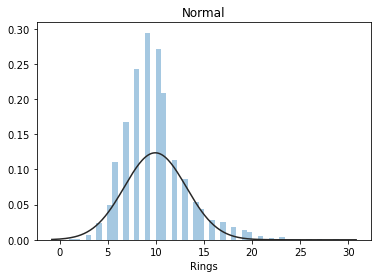

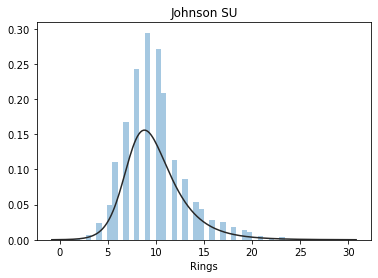

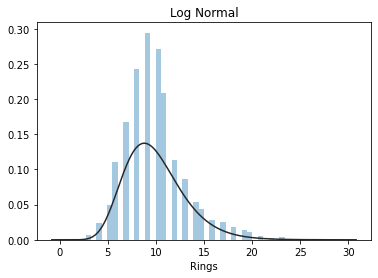

In [19]:
#Data Analysis-skewness of the target variable [Rings]
rings = df['Rings']
plt.figure(1);plt.title('Normal')
sns.distplot(rings,kde=False,fit=st.norm)
plt.figure(2);plt.title('Johnson SU')
sns.distplot(rings,kde=False,fit=st.johnsonsu)
plt.figure(3);plt.title('Log Normal')
sns.distplot(rings,kde=False,fit=st.lognorm)


Text(0, 0.5, 'count')

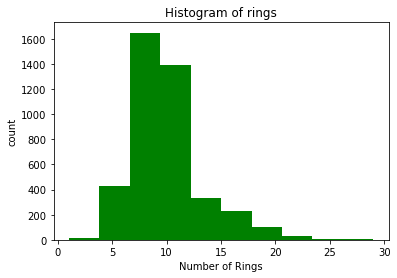

In [20]:
#None of theses distributions fit our data perfectly. So we need to find another one to match our data
plt.hist(rings,color='green')
plt.title('Histogram of rings')
plt.xlabel('Number of Rings')
plt.ylabel('count')

In [21]:
# To find strongly correlated variables
numeric_features = df.select_dtypes(include=[np.number])
correlation = numeric_features.corr()


In [25]:
print(correlation['Rings'].sort_values(ascending=False))

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Name: Rings, dtype: float64


<AxesSubplot:title={'center':'Correlation of numeric features'}>

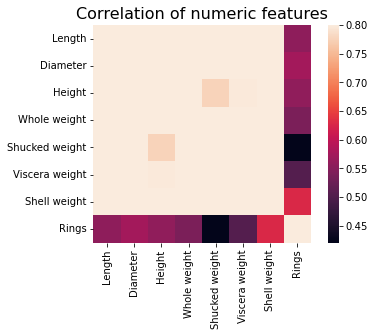

In [26]:
plt.title('Correlation of numeric features', y=1,size=16)
sns.heatmap(correlation,square=True,vmax=0.8)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


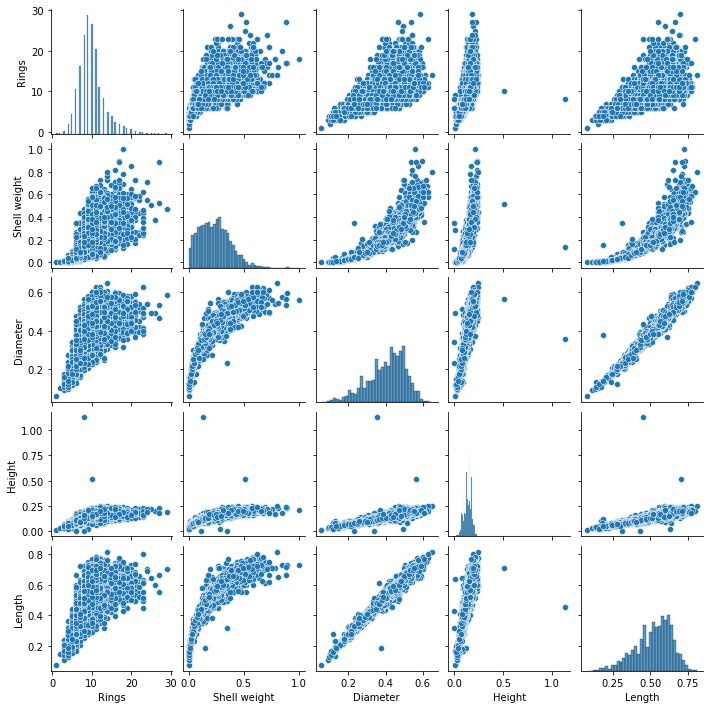

In [27]:
cols = ['Rings','Shell weight','Diameter','Height','Length']
sns.pairplot(df[cols],size=2,kind='scatter')
plt.show()

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of the Gender of Abalone')

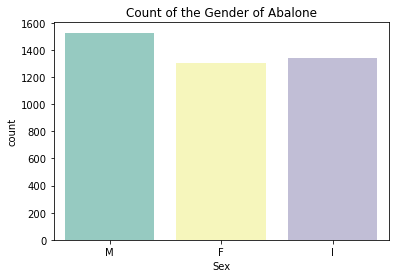

In [28]:
#most frequent Sex in the dataset,
sns.countplot(df['Sex'], palette="Set3")
plt.title('Count of the Gender of Abalone')

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of Rings')

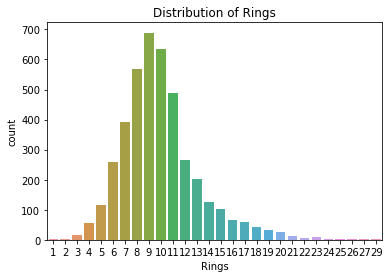

In [29]:
#Distribution of Rings
sns.countplot(df['Rings'])
plt.title('Distribution of Rings')

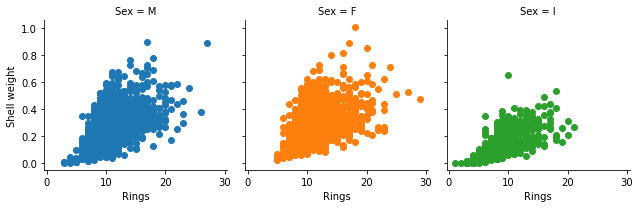

In [30]:
# To check highest correlation with Rings and comparison with different sexes.
p = sns.FacetGrid(df, col="Sex", hue="Sex")
p=p.map(plt.scatter,"Rings", "Shell weight")

<AxesSubplot:xlabel='Rings', ylabel='Shell weight'>

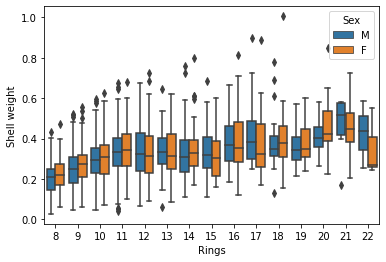

In [31]:
f = (df.loc[df['Sex'].isin(['M','F'])]
      .loc[:,['Shell weight','Rings','Sex']])

f = f[f["Rings"] >= 8]
f = f[f["Rings"] < 23]
sns.boxplot(x="Rings",y="Shell weight", hue='Sex',data=f)

<AxesSubplot:xlabel='Rings', ylabel='Shell weight'>

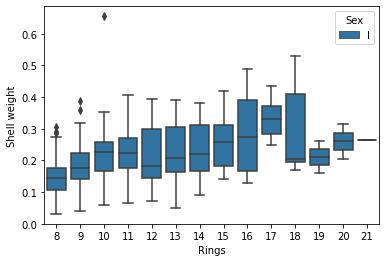

In [32]:
# Clear visualization of outliers
w = (df.loc[df['Sex'].isin(['I'])]
    .loc[:,['Shell weight','Rings','Sex']])
w = w[w["Rings"] >= 8]
w = w[w["Rings"] < 23]
sns.boxplot(x="Rings",y="Shell weight", hue='Sex',data=w)

In [33]:
#remove outliers and converting the observations into Zscores
from scipy import stats
z= np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
print(z)



        Length  Diameter    Height  Whole weight  Shucked weight  \
0     0.574558  0.432149  1.064424      0.641898        0.607685   
1     1.448986  1.439929  1.183978      1.230277        1.170910   
2     0.050033  0.122130  0.107991      0.309469        0.463500   
3     0.699476  0.432149  0.347099      0.637819        0.648238   
4     1.615544  1.540707  1.423087      1.272086        1.215968   
...        ...       ...       ...           ...             ...   
4172  0.341509  0.424464  0.609334      0.118813        0.047908   
4173  0.549706  0.323686  0.107991      0.279929        0.358808   
4174  0.632985  0.676409  1.565767      0.708212        0.748559   
4175  0.841182  0.777187  0.250672      0.541998        0.773341   
4176  1.549052  1.482634  1.326659      2.283681        2.640993   

      Viscera weight  Shell weight     Rings  
0           0.726212      0.638217  1.571544  
1           1.205221      1.212987  0.910013  
2           0.356690      0.207139  0.2896

In [34]:
# Removing all the data points that are below three standard deviations away from the mean.
df_o = df[(z < 3).all(axis=1)]


In [35]:
print("Shape of dataframe with outliers: "+ str(df.shape) , 
      "Shape of dataframe without outliers: " + str(df_o.shape))

Shape of dataframe with outliers: (4177, 9) Shape of dataframe without outliers: (4027, 9)


In [36]:
low_cardinality_cols = [cname for cname in df_o.columns if
                        df_o[cname].nunique() < 10 and 
                        df_o[cname].dtype == "object"]
numeric_cols = [cname for cname in df_o.columns if
                                 df_o[cname].dtype in ['int64','float64']]

my_cols = low_cardinality_cols + numeric_cols
df_predictors = df_o[my_cols]

In [37]:
df_predictors.dtypes.sample(7)

Diameter          float64
Shell weight      float64
Viscera weight    float64
Whole weight      float64
Length            float64
Sex                object
Shucked weight    float64
dtype: object

In [48]:
df_encoded_predictors = pd.get_dummies(df_predictors)

In [49]:
df_encoded_predictors.head(5)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [50]:
df_encoded_predictors.shape

(4027, 11)

In [51]:
# Now dataframe now has three new columns Sex_F, Sex_I and Sex_M.

In [53]:
#Decision Trees-Cross Validation

cross_cols = ['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Sex_F','Sex_I','Sex_M']
X = df_encoded_predictors[cross_cols]
y = df_encoded_predictors.Rings

decision_pipeline = make_pipeline(DecisionTreeRegressor())
decision_scores = cross_val_score(decision_pipeline, X,y,scoring='neg_mean_absolute_error')

print('MAE %2f' %(-1 * decision_scores.mean()))

MAE 1.943075


In [54]:
#Train Test Split
dt_train_X,dt_test_X,dt_train_y,dt_test_y = train_test_split(X,y)

In [55]:
def get_mae(max_leaf_nodes,dt_train_X,dt_test_X,dt_train_y,dt_test_y ):
    model_pipeline = make_pipeline(DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes,random_state=0))
    model_pipeline.fit(dt_train_X,dt_train_y)
    preds_val = model_pipeline.predict(dt_test_X)
    mae = mean_absolute_error(dt_test_y,preds_val)
    return(mae)

In [56]:
for max_leaf_nodes in [5,50,500,5000]:
    my_mae = get_mae(max_leaf_nodes,dt_train_X,dt_test_X,dt_train_y,dt_test_y)
    print("Max leaf nodes: %d \t\t MAE: %d" %(max_leaf_nodes,my_mae))

Max leaf nodes: 5 		 MAE: 1
Max leaf nodes: 50 		 MAE: 1
Max leaf nodes: 500 		 MAE: 1
Max leaf nodes: 5000 		 MAE: 1


In [57]:
decision_split_pipeline = make_pipeline(DecisionTreeRegressor(max_leaf_nodes=5))
decision_split_pipeline.fit(dt_train_X,dt_train_y)
decision_tree_prediction = decision_split_pipeline.predict(dt_test_X)
print("MAE: " + str(mean_absolute_error(decision_tree_prediction,dt_test_y)))

MAE: 1.6854557207500025


In [58]:
acc_decision = decision_split_pipeline.score(dt_test_X,dt_test_y)
print("Acc:", acc_decision )


Acc: 0.39429150187563744


In [59]:
#train-test split for the Decision Tree is best.

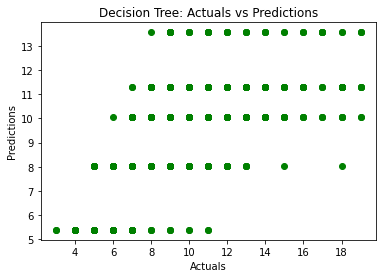

In [60]:
plt.scatter(dt_test_y,decision_tree_prediction,color='green')
plt.xlabel('Actuals')
plt.ylabel('Predictions')
plt.title('Decision Tree: Actuals vs Predictions')
plt.show()

In [61]:
#Random Forests-Cross Validation
forest_pipeline = make_pipeline(RandomForestRegressor(random_state=1))
forest_scores = cross_val_score(forest_pipeline, X,y,scoring="neg_mean_absolute_error")
print('MAE %2f' %(-1 * forest_scores.mean()))

MAE 1.473488


In [62]:
#Train Test Split
f_train_X,f_test_X,f_train_y,f_test_y = train_test_split(X,y)
forest_split_pipeline = make_pipeline(RandomForestRegressor(random_state=1))
forest_split_pipeline.fit(f_train_X,f_train_y)
forest_predictions = forest_split_pipeline.predict(f_test_X)
print("Accuracy:",forest_split_pipeline.score(f_test_X,f_test_y))
print("MAE:",str(mean_absolute_error(forest_predictions,f_test_y)))

Accuracy: 0.5120022163635816
MAE: 1.4983614697120158


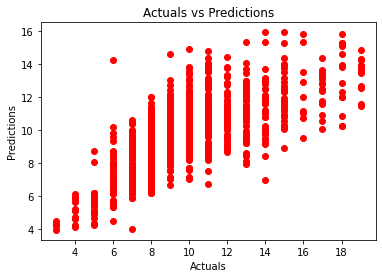

In [63]:
plt.scatter(f_test_y,forest_predictions,color='red')
plt.xlabel('Actuals')
plt.ylabel('Predictions')
plt.title('Actuals vs Predictions')
plt.show()

In [64]:
#XGBoost
xgb_pipeline = make_pipeline(XGBRegressor())
xgb_scores = cross_val_score(xgb_pipeline,X.values,y.values,scoring="neg_mean_absolute_error")
print("MAE %2f" %(-1 * xgb_scores.mean()) )

MAE 1.516654


In [65]:
#Train Test Split
train_X,test_X,train_y,test_y = train_test_split(X.values,y.values,test_size=0.25)

In [66]:
xgb_model = XGBRegressor()
xgb_model.fit(train_X,train_y,verbose=False)
xgb_preds = xgb_model.predict(test_X)
print("MAE: " + str(mean_absolute_error(xgb_preds,test_y)))
print("Accuracy:",xgb_model.score(test_X,test_y))

MAE: 1.5163913066716275
Accuracy: 0.44197959128504016


In [67]:
xgb_model_II = XGBRegressor(n_estimators=1000,learning_rat=0.05)
xgb_model_II.fit(train_X,train_y,early_stopping_rounds=5,
             eval_set=[(test_X,test_y)],verbose=False)
xgb_preds = xgb_model_II.predict(test_X)
print("MAE: " + str(mean_absolute_error(xgb_preds,test_y)))
print("Accuracy:",xgb_model_II.score(test_X,test_y))


[06:39:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "learning_rat" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


MAE: 1.3843979127594115
Accuracy: 0.5168116288649857


C:\Users\dell\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


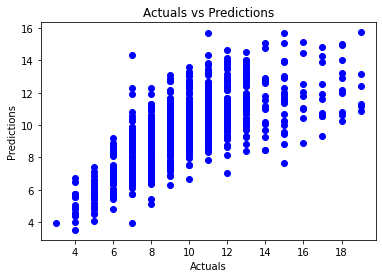

In [68]:
plt.scatter(test_y,xgb_preds,color='blue')
plt.xlabel('Actuals')
plt.ylabel('Predictions')
plt.title('Actuals vs Predictions')
plt.show()